# 5. Examples of Visual Analytics in Python

![](images/logo.png)

Hello and welcome to another session with the DataKirk. This week it's colour time! 

If you're working on the server at https://jupyterhub.thedatakirk.org.uk/ then all the relevant libraries (Matplotlib, Pandas etc) should already be installed and ready to use. However, if you're running the code on your own computer (which we do advise at this point as it will accelerate your learning!) then you'll need to make sure that you have installed them. This can be done by opening up a command prompt and typing 

```
pip install matplotlib pandas
```

To check whether you have these libraries installed, run the cell below. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

As long as you get no errors, you are good to go! Once the libraries are imported, it's also a good idea to run the line in the cell below:

In [2]:
%matplotlib notebook

The will make all Matplotlib plots interactive so you can pan, zoom and move around within the figure. Once you have run this cell you should see these options at the bottom of every plot:

![](images/mplnb.png)

If you don't see them when you begin plotting, try going back and running the cell above again. 

Here are some useful links for the session:

1. List of matplotlib colours: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
2. Google colour picker: https://www.google.com/search?q=color+picker


This session will be a little different from the last few. Rather than give you questions and answers, it will be a bit more open-ended! I will just provide 3 different datasets and you can use the tools from the presentation to visualise the data any way you like. 

You don't have to explore all of these datasets - if you want to pick one to focus on that's fine. 


# 1. Coronavirus data UK

The first dataset contains information about the spread of coronavirus in Scotland, England, Wales and Northern Ireland. 

Potential analysis suggestions: 

1. To what extent are caseloads correlated amongst the four nations? 
2. What aspects are the same and different about the first and second wave? 
3. How are the different nations comparing in the fight against covid? 

Feel free to find additional data such as population numbers, or dates of lockdown. 

In [3]:
data_sco = pd.read_csv('data/covid/Corona_Scot.csv', index_col=0, parse_dates=True)

data_wal = pd.read_csv('data/covid/Corona_Wales.csv', index_col=0, parse_dates=True)

data_eng = pd.read_csv('data/covid/Corona_Eng.csv', index_col=0, parse_dates=True)

data_nir = pd.read_csv('data/covid/Corona_NI.csv', index_col=0, parse_dates=True)

<IPython.core.display.Javascript object>


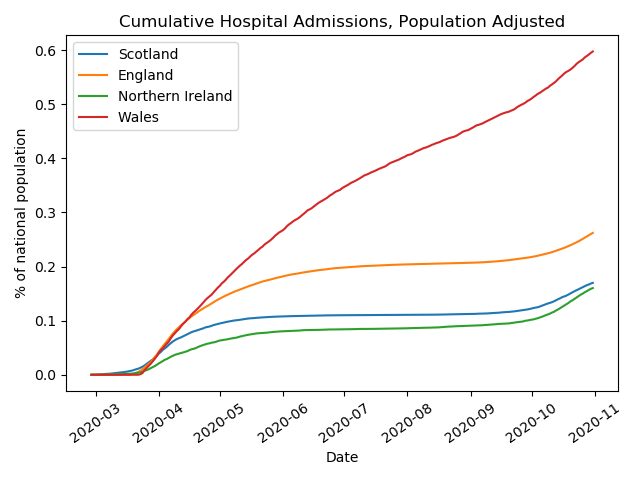

In [4]:
# ------------------ Graph 1: cumulative hospital admissions, as a percentage of population -----------------

# population estimates for the nations

pop_eng = 55000000
pop_sco = 5400000
pop_wal = 3100000
pop_nir = 1850000

# make new dataframes where everything is a percentage of the population
# this is done by multiplying the whole table by 100, and dividing the whole table by the relevant population

data_sco_pop_adj = 100 * data_sco / pop_sco
data_eng_pop_adj = 100 * data_eng / pop_eng
data_wal_pop_adj = 100 * data_wal / pop_wal
data_nir_pop_adj = 100 * data_nir / pop_nir


# create a new figure
plt.figure()


# this will be the x-data: the list of all the days in the index of data_scot
x = data_sco.index


# plot all data
plt.plot(x, data_sco_pop_adj['cumAdmissions'], label='Scotland')
plt.plot(x, data_eng_pop_adj['cumAdmissions'], label='England')
plt.plot(x, data_nir_pop_adj['cumAdmissions'], label='Northern Ireland')
plt.plot(x, data_wal_pop_adj['cumAdmissions'], label='Wales')

# rotate xticks
plt.xticks(rotation=35)

# add key
plt.legend()

# add axis labels
plt.xlabel('Date')
plt.ylabel('% of national population')
plt.title('Cumulative Hospital Admissions, Population Adjusted')

# tight layout
plt.tight_layout()


<IPython.core.display.Javascript object>


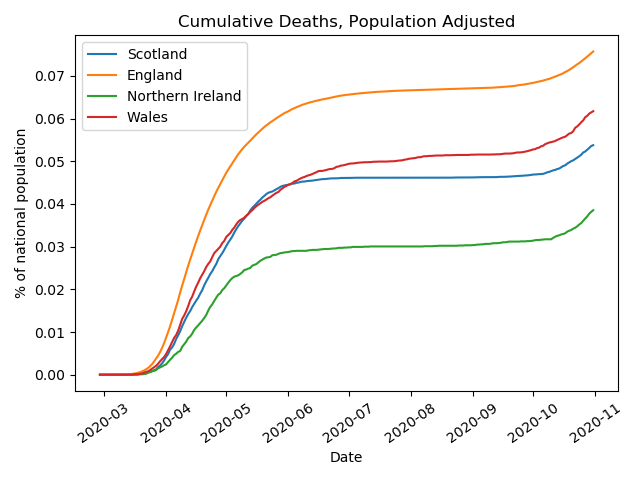

In [5]:
# ------------------ Graph 2: cumulative deaths, as a percentage of population -----------------


# create a new figure
plt.figure()


# this will be the x-data: the list of days up to 2020-10-31
x = data_sco.index


# plot all data
plt.plot(x, data_sco_pop_adj['cumDeaths'], label='Scotland')
plt.plot(x, data_eng_pop_adj['cumDeaths'], label='England')
plt.plot(x, data_nir_pop_adj['cumDeaths'], label='Northern Ireland')
plt.plot(x, data_wal_pop_adj['cumDeaths'], label='Wales')

# rotate xticks
plt.xticks(rotation=35)

# add key
plt.legend()

# add axis labels
plt.xlabel('Date')
plt.ylabel('% of national population')
plt.title('Cumulative Deaths, Population Adjusted')

# tight layout
plt.tight_layout()

<IPython.core.display.Javascript object>


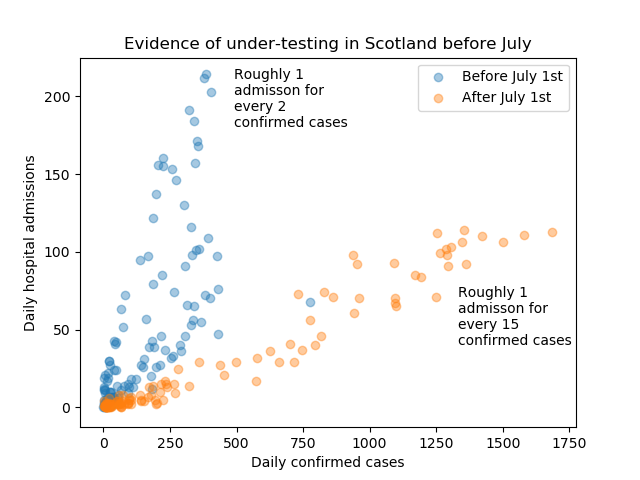

Text(1330, 40, 'Roughly 1 \nadmisson for\nevery 15\nconfirmed cases')

In [6]:
# -------- Graph 2: the relationship between confirmed cases and admissions before and after july --------

july = '2020-07-01'

plt.figure()

cases_before = data_sco['newCases'].loc[:july]        # data up to july
cases_after =  data_sco['newCases'].loc[july:]        # data from july onwards

admis_before = data_sco['newAdmissions'].loc[:july]   # data up to july
admis_after =  data_sco['newAdmissions'].loc[july:]   # data from july onwards


# scatter two clouds
plt.scatter(cases_before, admis_before, color='tab:blue', alpha=0.4, label='Before July 1st')
plt.scatter(cases_after, admis_after,  color='tab:orange', alpha=0.4, label='After July 1st')
    

# add axis labels
plt.xlabel('Daily confirmed cases')
plt.ylabel('Daily hospital admissions')
plt.title('Evidence of under-testing in Scotland before July')


# add a key
plt.legend()

# add annotions
plt.text(490, 180, 'Roughly 1 \nadmisson for\nevery 2\nconfirmed cases')
plt.text(1330, 40, 'Roughly 1 \nadmisson for\nevery 15\nconfirmed cases')

# 2. Stock price data

The second dataset contains stock price information since 2012 for the largest 20 companies listed in the United Kingdom:

Potential analysis suggestions: 

1. How has coronavirus affected the stock market in the UK?
2. How correlated are stocks in the UK?
3. Which stocks are the biggest winners and the biggest losers in the last 8 years?

In [7]:
price_data = pd.read_csv('data/stocks/FTSE_stock_prices.csv', index_col='Date', parse_dates=True)

company_info = pd.read_csv('data/stocks/companies.csv')

<IPython.core.display.Javascript object>


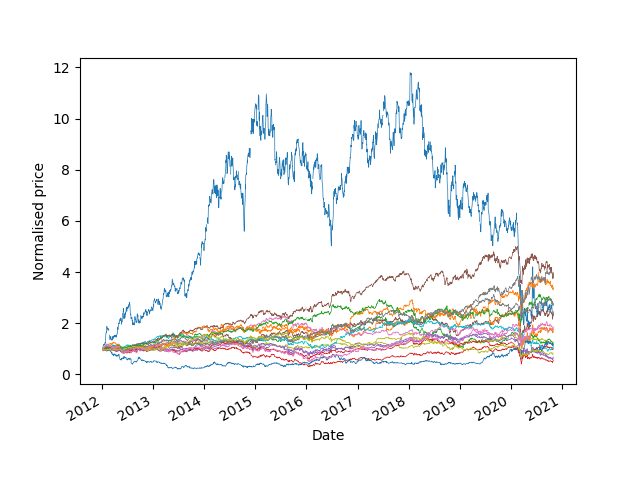

Text(0, 0.5, 'Normalised price')

In [8]:
# --------------- Graph 1: overview of all stocks --------------


# normalisa price data, by dividing each column by it's ititial value
# that way every stock starts with a price of 1 and they can be more easily compared

price_data_normalised = price_data / price_data.loc['2012-01-03']


# use pandas shortcut to plot all columns. Add argument to not show cluttered key and decrease line width
price_data_normalised.plot(legend=False, lw=0.5)

plt.ylabel('Normalised price')

<IPython.core.display.Javascript object>


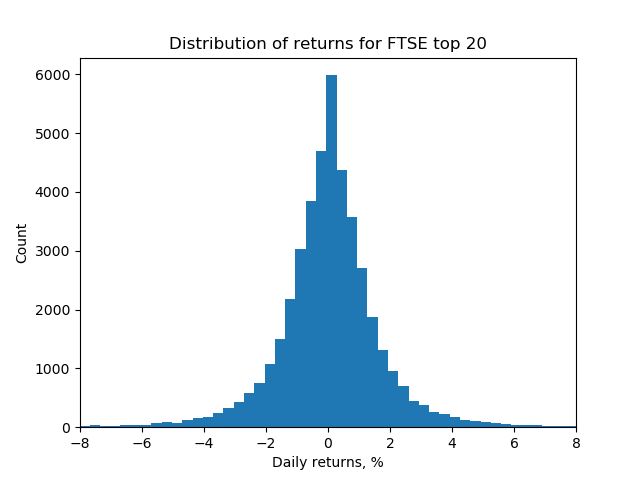

(-8, 8)

In [9]:
# --------------- Graph 2: histogram of all returns --------------

# the return of a stock is defined as the percentage change on a given day
# this can be calculated with the special .pct_change() pandas method
# however, gives a result that still needs to be multiplied by 100 to give a true percent

returns_data = price_data.pct_change() * 100

plt.figure()

# flatten the table into a single array
all_returns = returns_data.values.flatten()

plt.hist(all_returns, bins=200)


plt.xlabel('Daily returns, %')
plt.ylabel('Count')
plt.title('Distribution of returns for FTSE top 20')

plt.xlim(-8, 8)

<IPython.core.display.Javascript object>


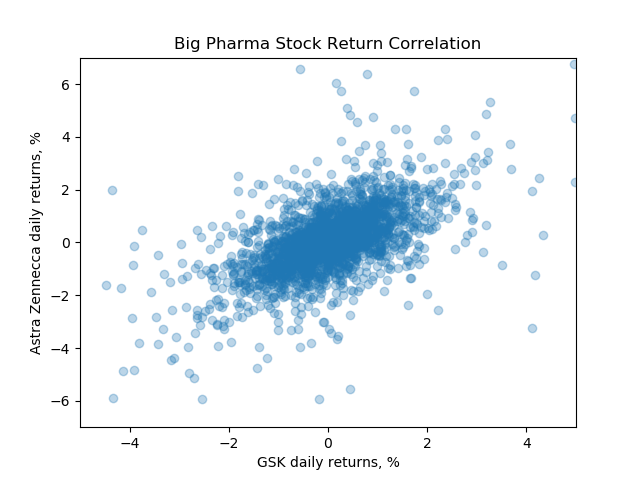

Text(0.5, 1.0, 'Big Pharma Stock Return Correlation')

In [10]:
# --------------- Graph 3: correlation of returns for big pharma --------------

plt.figure()

plt.scatter(returns_data['GSK'], returns_data['AZN'], alpha=0.3)

plt.xlim(-5, 5)
plt.ylim(-7, 7)

plt.xlabel('GSK daily returns, %')
plt.ylabel('Astra Zennecca daily returns, %')
plt.title('Big Pharma Stock Return Correlation')


# 3. Income, Inequality and Environment

The final dataset contains annual data for GDP, inequality and carbon emissions for 192 countries around the world. 

Potential analysis suggestions: 

1. What is the relation between GDP and carbon emissions?
2. What trends in time can you identify?
3. Is there a relation between carbon emissions and inequality? 

Helpful hint: 

Sometimes is can be helpful to set the scale of an axis to logarithmic - this can be done by calling 

```python
plt.xscale('log')
```

or 

```python
plt.yscale('log')
```

In [11]:
population = pd.read_csv('data/national/population.csv', index_col=0, parse_dates=True)

co2_per_person = pd.read_csv('data/national/co2_emissions_tonnes_per_person.csv', index_col=0, parse_dates=True)

gdp_per_cap = pd.read_csv('data/national/gdppercapita_us_inflation_adjusted.csv', index_col=0, parse_dates=True)

inequality_metric = pd.read_csv('data/national/gini.csv', index_col=0, parse_dates=True)

<IPython.core.display.Javascript object>


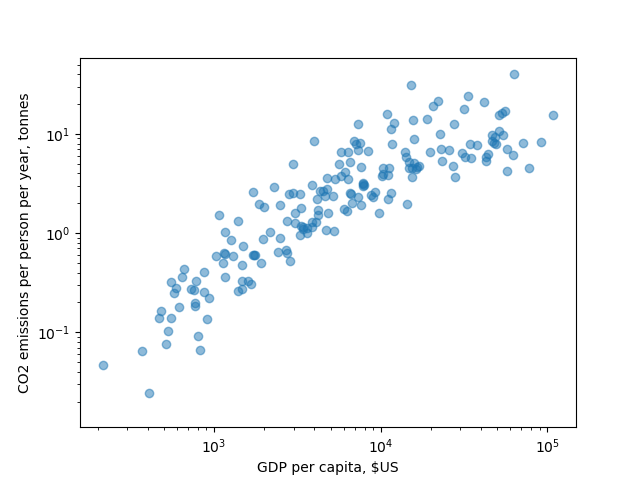

Text(0, 0.5, 'CO2 emissions per person per year, tonnes')

In [12]:
# ---------------- Graph 1: correlation between  co2 and gdp in 2017 ---------------------

plt.figure()

plt.scatter(gdp_per_cap.loc['2017'], co2_per_person.loc['2017'], alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('GDP per capita, $US')
plt.ylabel('CO2 emissions per person per year, tonnes')


<IPython.core.display.Javascript object>


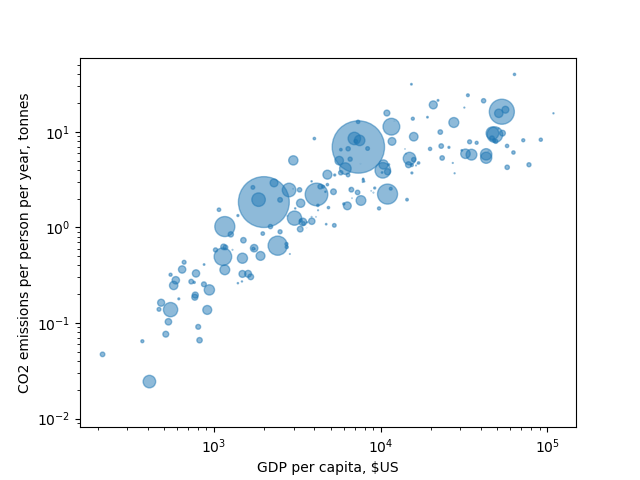

Text(0, 0.5, 'CO2 emissions per person per year, tonnes')

In [13]:
# ---------------- Graph 2: same as graph 1, but with marker size representing population size ------------------

plt.figure()

plt.scatter(gdp_per_cap.loc['2017'], co2_per_person.loc['2017'], s=population.loc['2017'] / 1e6, alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('GDP per capita, $US')
plt.ylabel('CO2 emissions per person per year, tonnes')



<IPython.core.display.Javascript object>


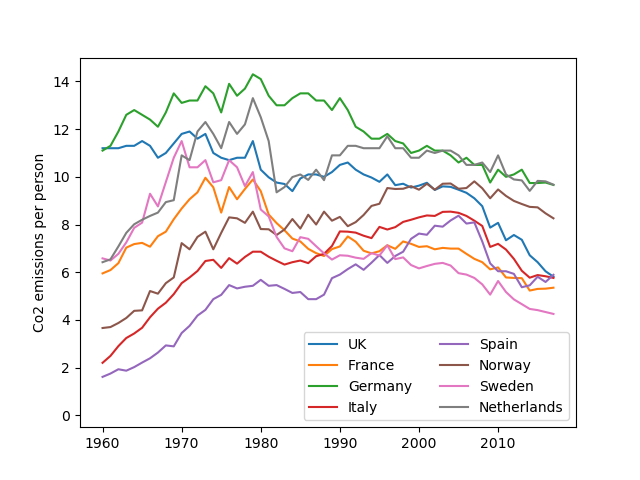

Text(0, 0.5, 'Co2 emissions per person')

In [14]:
# ---------------- GRAPH 3: CO2 emissions over time in europe  ------------------

plt.figure()

x = co2_per_person.index

plt.plot(x, co2_per_person['United Kingdom'], label='UK')
plt.plot(x, co2_per_person['France'], label='France')
plt.plot(x, co2_per_person['Germany'], label='Germany')
plt.plot(x, co2_per_person['Italy'], label='Italy')
plt.plot(x, co2_per_person['Spain'], label='Spain')
plt.plot(x, co2_per_person['Norway'], label='Norway')
plt.plot(x, co2_per_person['Sweden'], label='Sweden')
plt.plot(x, co2_per_person['Netherlands'], label='Netherlands')


plt.ylim(-0.5, 15)

plt.legend(loc='lower right', ncol=2)

plt.ylabel('Co2 emissions per person')

<IPython.core.display.Javascript object>


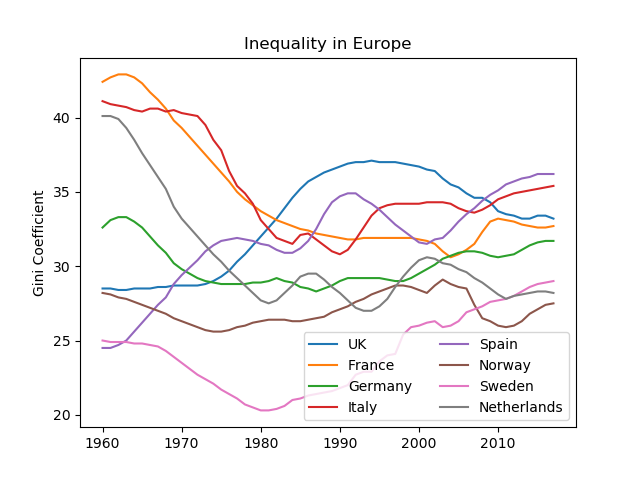

Text(0.5, 1.0, 'Inequality in Europe')

In [15]:
# ---------------- GRAPH 4: inequality over time in europe  ------------------

plt.figure()

x = co2_per_person.index

plt.plot(x, inequality_metric['United Kingdom'], label='UK')
plt.plot(x, inequality_metric['France'], label='France')
plt.plot(x, inequality_metric['Germany'], label='Germany')
plt.plot(x, inequality_metric['Italy'], label='Italy')
plt.plot(x, inequality_metric['Spain'], label='Spain')
plt.plot(x, inequality_metric['Norway'], label='Norway')
plt.plot(x, inequality_metric['Sweden'], label='Sweden')
plt.plot(x, inequality_metric['Netherlands'], label='Netherlands')

plt.ylabel('Gini Coefficient')
plt.legend(loc='lower right', ncol=2)
plt.title('Inequality in Europe')